In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('item-2018-06-01-2018-07-05.csv')
item = pd.DataFrame(df)
item.head(10)

SDATE STORE_CODE  POSID  BASK_CODE  PROD_CODE  ITEM_QUANTITY  \
0  2018-06-01       D007      3     250451      29405          1.000   
1  2018-06-01       D007      3     250451      13187          1.000   
2  2018-06-01       D007      3     250243     196249          1.000   
3  2018-06-01       D007      3     250243     199637          1.000   
4  2018-06-01       D007      1     160905     195012          3.222   
5  2018-06-01       D007      1     160905     194904          3.522   
6  2018-06-01       D007      3     250458      56371          1.000   
7  2018-06-01       D007      3     250241      75124         12.000   
8  2018-06-01       D007      8       5346     195988          1.000   
9  2018-06-01       D007      8       5346       3096          1.000   

   ITEM_SPEND  NORMAL_PRICE DISCOUNT_TYPE  DISCOUNT_AMOUNT  
0        1.70           2.0             m             -0.3  
1        1.00           1.0             n              0.0  
2       99.00          99.0             m              0.0  
3        9.90          16.8             p             -6.9  
4       18.69           5.8             n              0.0  
5       35.22          10.0             n              0.0  
6        8.00           8.0             n              0.0  
7       30.00           2.5             n              0.0  
8        4.90           5.8             m             -0.9  
9        8.90          12.9             p             -4.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732761 entries, 0 to 1732760
Data columns (total 10 columns):
SDATE              object
STORE_CODE         object
POSID              int64
BASK_CODE          int64
PROD_CODE          int64
ITEM_QUANTITY      float64
ITEM_SPEND         float64
NORMAL_PRICE       float64
DISCOUNT_TYPE      object
DISCOUNT_AMOUNT    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 132.2+ MB


In [5]:
item['sales'] = item['ITEM_QUANTITY']*item['ITEM_SPEND']
item.head(10)

SDATE STORE_CODE  POSID  BASK_CODE  PROD_CODE  ITEM_QUANTITY  \
0  2018-06-01       D007      3     250451      29405          1.000   
1  2018-06-01       D007      3     250451      13187          1.000   
2  2018-06-01       D007      3     250243     196249          1.000   
3  2018-06-01       D007      3     250243     199637          1.000   
4  2018-06-01       D007      1     160905     195012          3.222   
5  2018-06-01       D007      1     160905     194904          3.522   
6  2018-06-01       D007      3     250458      56371          1.000   
7  2018-06-01       D007      3     250241      75124         12.000   
8  2018-06-01       D007      8       5346     195988          1.000   
9  2018-06-01       D007      8       5346       3096          1.000   

   ITEM_SPEND  NORMAL_PRICE DISCOUNT_TYPE  DISCOUNT_AMOUNT      sales  
0        1.70           2.0             m             -0.3    1.70000  
1        1.00           1.0             n              0.0    1.00000  
2       99.00          99.0             m              0.0   99.00000  
3        9.90          16.8             p             -6.9    9.90000  
4       18.69           5.8             n              0.0   60.21918  
5       35.22          10.0             n              0.0  124.04484  
6        8.00           8.0             n              0.0    8.00000  
7       30.00           2.5             n              0.0  360.00000  
8        4.90           5.8             m             -0.9    4.90000  
9        8.90          12.9             p             -4.0    8.90000

Text(0.5, 1.0, 'sales top10')

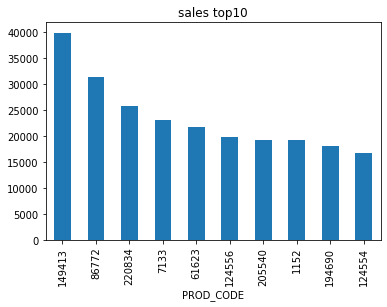

In [54]:
#获取产品数量大于0，按商品货号分组，对商品数量进行求和，从大到小进行排序，得到销售量前十的商品
item[item['ITEM_QUANTITY']>0].groupby('PROD_CODE')['ITEM_QUANTITY'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("sales top10")


In [29]:
#获取产品数量大于0，按商品货号分组，对销售金额进行求和，从大到小进行排序，得到交易额前十的商品
great_sales=item[item['ITEM_QUANTITY']>0].groupby('PROD_CODE')['sales'].sum().sort_values(ascending=False)
great_sales.head(10)

PROD_CODE
220834    6.579461e+07
149413    5.523005e+07
7137      5.371496e+07
101421    4.115185e+07
11929     3.063493e+07
7133      2.582701e+07
220320    1.659394e+07
199639    1.496316e+07
1157      1.232511e+07
199628    1.165406e+07
Name: sales, dtype: float64

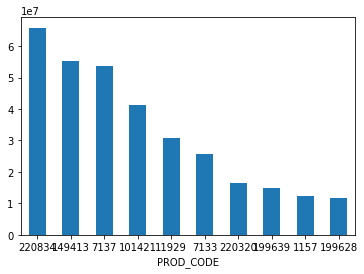

In [31]:
great_sales.head(10).plot(kind='bar',alpha=1,rot=0)
plt.show()
#销售额排名前十的产品销售额差距比较大。

In [8]:
#哪天的销售额最高，可看出月中的销售额偏高
item[item['ITEM_QUANTITY']>0].groupby('SDATE')['ITEM_QUANTITY'].sum().sort_values(ascending=False).head(20)

SDATE
2018-06-17    152630.355
2018-06-18    144507.245
2018-06-16    121575.940
2018-06-13     89970.297
2018-06-15     86899.140
2018-06-03     80749.489
2018-06-02     79518.920
2018-06-01     78168.366
2018-06-10     77137.731
2018-06-30     76815.062
2018-07-01     73839.758
2018-06-14     72425.738
2018-06-27     71612.438
2018-07-03     71609.276
2018-06-05     70539.302
2018-07-04     69428.277
2018-06-09     68745.181
2018-07-02     67429.814
2018-06-23     63536.020
2018-06-29     63297.312
Name: ITEM_QUANTITY, dtype: float64

In [9]:
#客单价，即平均交易金额，是指平均每个客户交易金额，客单价等于成交金额/成交用户数。
#销售额是由客单价和用户数所决定的，要提升产品的销售额，除了尽可能多地吸引客流，增加顾客交易次数以外，提高客单价也是非常重要的途径。
sumPrice=item[item['ITEM_QUANTITY']>0]['sales'].sum()
countID=item[item['ITEM_QUANTITY']>0]['SDATE'].count()
avgPrice = sumPrice/countID
print(avgPrice)

281.8500158125718


In [37]:
#销售量后十的商品
quantity = item[item['ITEM_QUANTITY']>0].groupby('PROD_CODE')['ITEM_QUANTITY'].sum().sort_values(ascending=False)
quantity.tail(10)


PROD_CODE
152624    0.106
207123    0.102
221623    0.100
209747    0.086
178247    0.086
223171    0.086
189718    0.064
24925     0.048
56482     0.046
207282    0.036
Name: ITEM_QUANTITY, dtype: float64

In [36]:
#销售额后十的商品
great_sales=item[item['ITEM_QUANTITY']>0].groupby('PROD_CODE')['sales'].sum().sort_values(ascending=False)
great_sales.tail(10)

PROD_CODE
207123    0.34986
185711    0.34848
221623    0.27600
115651    0.24864
223171    0.24854
209747    0.18920
189718    0.16192
207282    0.06156
56482     0.05290
24925     0.03936
Name: sales, dtype: float64

In [39]:
#分析销量和销售额最后100个的交集，如果这些产品的销量和销售额都不行，需要看看是不是要优化或者下架。
problem_prod = quantity.tail(100).index.intersection(great_sales.tail(100).index)
problem_prod

Int64Index([ 24893,  21710,  21814,  71459,  56483,  26747,  21793,  77166,
            211183, 210413, 222266,  24924, 214590, 219564, 186356,  72785,
             24914, 211920, 221175, 211914, 222366, 222042, 208335, 218828,
            185153, 208183, 217584,  60360, 207276,  60839,  26703, 218821,
             24892,  24917, 189543, 214589, 161349,  72801,  21920, 208177,
            214493,  21700, 211912, 106457, 185711, 213611, 115651, 152624,
            207123, 221623, 209747, 178247, 223171, 189718,  24925,  56482,
            207282],
           dtype='int64', name='PROD_CODE')

In [12]:
df_1=pd.read_csv('Basket-2018-06-01-2018-07-05.csv')
basket = pd.DataFrame(df_1)
basket.head(10)

SHOP_DATETIME STORE_CODE  POS_NO  BASK_CODE  BASK_SPEND
0    2018-06-01       D007       3     250458        8.00
1    2018-06-01       D007       3     250200       32.70
2    2018-06-01       D007       1     161068       16.80
3    2018-06-01       D007       8       5325       30.40
4    2018-06-01       D007       8       5361      191.30
5    2018-06-01       D007       3     250225       77.27
6    2018-06-01       D007       3     250309       72.07
7    2018-06-01       D007       4      47502       27.21
8    2018-06-01       D007       3     250520       11.80
9    2018-06-01       D007       1     160957      141.82

In [15]:
#根据篮子数据，按照日期分组，对每天的收入量进行统计
basket[basket['BASK_SPEND']>0].groupby('SHOP_DATETIME')['BASK_SPEND'].sum().sort_values(ascending=False).head(10)

SHOP_DATETIME
2018-06-17    1510911.65
2018-06-18    1262614.63
2018-06-16    1174917.21
2018-06-15     778783.56
2018-06-02     730030.08
2018-06-13     727913.43
2018-06-30     721941.00
2018-06-01     719667.99
2018-06-10     705195.22
2018-06-03     685279.36
Name: BASK_SPEND, dtype: float64

In [24]:
#在item表中提取日期中的月份，添加一列，以为月份分组作准备
import datetime
from datetime import datetime

dt = item["SDATE"]
dt = dt.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
item['month'] = dt.map(lambda x: x.month)

item.head(1)

SDATE STORE_CODE  POSID  BASK_CODE  PROD_CODE  ITEM_QUANTITY  \
0  2018-06-01       D007      3     250451      29405            1.0   

   ITEM_SPEND  NORMAL_PRICE DISCOUNT_TYPE  DISCOUNT_AMOUNT  sales  month  
0         1.7           2.0             m             -0.3    1.7      6

In [26]:
#在basket表中提取日期中的月份，添加一列，以为月份分组作准备
import datetime
from datetime import datetime

dt = basket["SHOP_DATETIME"]
dt = dt.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
basket['month'] = dt.map(lambda x: x.month)

basket.head(1)

SHOP_DATETIME STORE_CODE  POS_NO  BASK_CODE  BASK_SPEND  month
0    2018-06-01       D007       3     250458         8.0      6

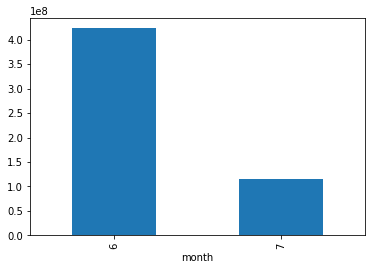

In [55]:
g_month_1 = basket.groupby('month')
g_month_2 = item.groupby('month')
#每月消费总金额
g_month_2.sales.sum().plot(kind='bar')
#7月销售额下降

In [46]:
price = item[item['NORMAL_PRICE']>0].groupby('PROD_CODE')['NORMAL_PRICE'].sum().sort_values(ascending=False)
price.head(10)

PROD_CODE
136839    249375.0
60205     231052.0
7137      163732.0
75283     154067.2
72750     147821.2
154900    146270.0
219118    142080.0
21835     141041.2
72828     124731.6
147291    123372.0
Name: NORMAL_PRICE, dtype: float64

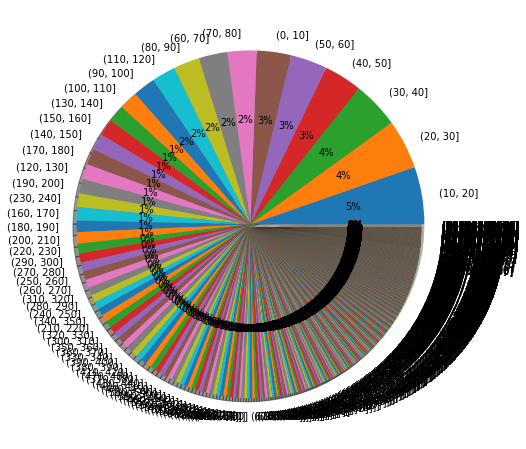

In [51]:
bins = np.arange(0,25000,10)
price_cut = pd.cut(price,bins).value_counts()
plt.figure(figsize=(12,8))
m = plt.pie(x=price_cut.values,labels=price_cut.index,autopct='%d%%',shadow=True)